In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#from tensorflow.keras import layers 

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
X_train=X_train/255
X_test=X_test/255

In [3]:
print(X_train)
print(y_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[5 0 4 ...

In [4]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


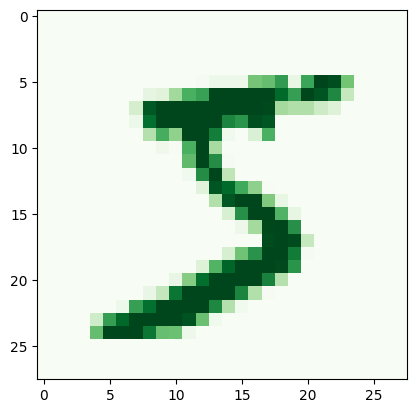

In [6]:
plt.imshow(X_train[0],cmap='Greens') # turns binary values into images

In [7]:
model_lr=tf.keras.models.Sequential([
  tf.keras.layers.Input(X_train.shape[1:]),  #Takes the shape of X from 2nd place i.e. 28 to 28 (28,28)
  tf.keras.layers.Flatten(), # Turns the n_d input into 2d one being 60000 and next being 28*28= 728
  tf.keras.layers.Dense(10 , activation='softmax') #outputs sets of probablites that add up to 1 of all the possabilites
])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])
model_lr.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
y_10_train=tf.one_hot(y_train,10) # Turns y into a vector with 10 items and no 8 being [0 0 0 0 0 0 0 1 0 0]
model_lr.fit(X_train,y_10_train) # makes comparision of x and y

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8163 - loss: 0.7168


In [9]:
model_lr=tf.keras.models.Sequential([
  tf.keras.layers.Input(X_train.shape[1:]),  #Takes the shape of X from 2nd place i.e. 28 to 28 (28,28)
  tf.keras.layers.Flatten(), # Turns the n_d input into 2d one being 60000 and next being 28*28
  tf.keras.layers.Dense(10 , activation='softmax') #outputs sets of probablites that add up to 1 of all the possabilites
])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy']) #automaticall does one_hot inversion
model_lr.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history_lr=model_lr.fit(X_train,y_train, epochs=10, #how many times it will run    ,history_lr stors all the data like its accuracy blah blah
             batch_size=128, # How many sampels per gradient are updated
             validation_split=0.2,
             verbose=False) # does not shows the epoch 1/10 blah blah
# Or can do validation_data=(X,y)

In [11]:
history_lr.history

{'accuracy': [0.8178958296775818,
  0.8963333368301392,
  0.9075208306312561,
  0.9125208258628845,
  0.9169166684150696,
  0.9190000295639038,
  0.9204999804496765,
  0.9224791526794434,
  0.9229583144187927,
  0.9241041541099548],
 'loss': [0.752077579498291,
  0.38981038331985474,
  0.3389241397380829,
  0.31516700983047485,
  0.3006473779678345,
  0.2910333573818207,
  0.28401994705200195,
  0.2782059609889984,
  0.2740309536457062,
  0.26981261372566223],
 'val_accuracy': [0.8966666460037231,
  0.9101666808128357,
  0.9149166941642761,
  0.9196666479110718,
  0.9200833439826965,
  0.9228333234786987,
  0.9242500066757202,
  0.9246666431427002,
  0.9255833625793457,
  0.9275833368301392],
 'val_loss': [0.40964946150779724,
  0.3348881006240845,
  0.3083915710449219,
  0.29526689648628235,
  0.28547680377960205,
  0.2792656421661377,
  0.27407389879226685,
  0.27064523100852966,
  0.27069491147994995,
  0.2661275565624237]}

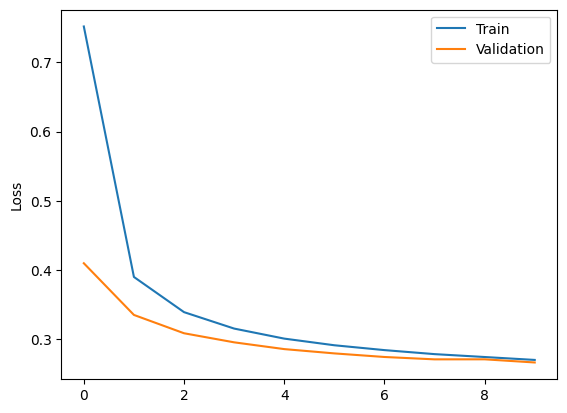

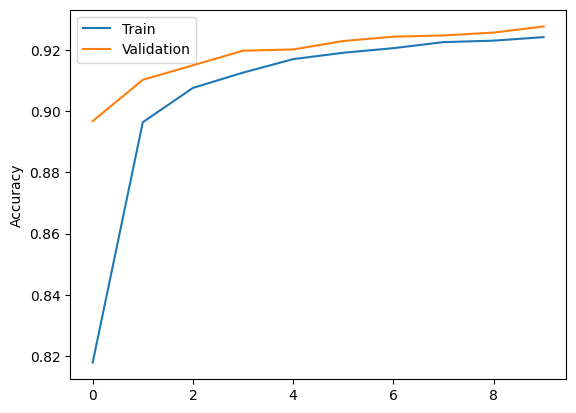

In [12]:
plt.plot(history_lr.history['loss'] , label='Train')
plt.plot(history_lr.history['val_loss'] , label='Validation')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'] , label='Train')
plt.plot(history_lr.history['val_accuracy'] , label='Validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#Plotting the graphs

In [13]:
model_lr.evaluate(X_test,y_test) # gives the final evaluation on the test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9129 - loss: 0.3051


[0.2693864703178406, 0.9240999817848206]

In [14]:
model_lr.predict(X_test[:5]) #predicts the first 5 no. of X 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.4978388e-05, 6.4902178e-10, 4.1499999e-05, 5.8348668e-03,
        1.6999053e-06, 2.9326151e-05, 7.9767908e-09, 9.9332267e-01,
        2.5823039e-05, 7.2913751e-04],
       [4.3408471e-04, 2.1920394e-05, 9.9032253e-01, 4.2552862e-04,
        3.3200075e-12, 1.6317850e-03, 7.0202583e-03, 8.0693217e-14,
        1.4385243e-04, 1.4207739e-10],
       [1.3426176e-05, 9.6620184e-01, 1.4489138e-02, 4.1170446e-03,
        3.7913455e-04, 9.7625464e-04, 2.1805516e-03, 4.0749186e-03,
        6.9432245e-03, 6.2446127e-04],
       [9.9931622e-01, 2.5499525e-10, 1.0044221e-04, 8.1562384e-06,
        1.7240808e-07, 2.5770871e-04, 1.9502915e-04, 6.8711015e-05,
        3.3636610e-05, 1.9966299e-05],
       [4.1056075e-04, 1.5947209e-06, 2.4186219e-03, 6.1098886e-05,
        9.6390647e-01, 1.3198894e-04, 1.9741198e-03, 2.5063027e-03,
        4.4196048e-03, 2.4169676e-02]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[1.4978388e-05 6.4902178e-10 4.1499999e-05 5.8348668e-03 1.6999053e-06
 2.9326151e-05 7.9767908e-09 9.9332267e-01 2.5823039e-05 7.2913751e-04]  =>  7


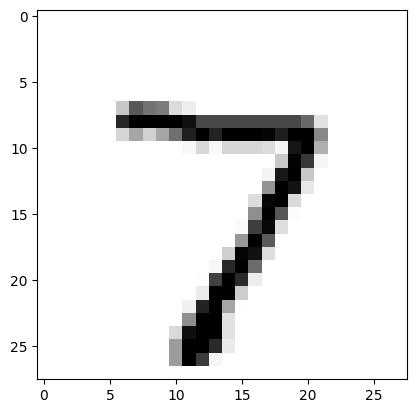

[4.3408471e-04 2.1920394e-05 9.9032253e-01 4.2552862e-04 3.3200075e-12
 1.6317850e-03 7.0202583e-03 8.0693217e-14 1.4385243e-04 1.4207739e-10]  =>  2


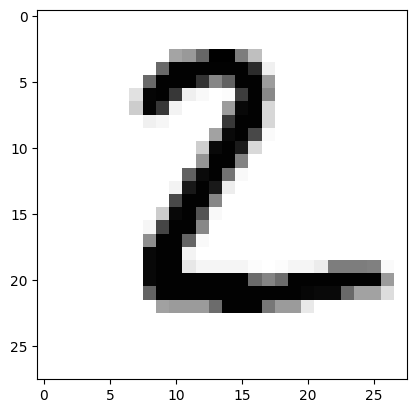

[1.3426176e-05 9.6620184e-01 1.4489138e-02 4.1170446e-03 3.7913455e-04
 9.7625464e-04 2.1805516e-03 4.0749186e-03 6.9432245e-03 6.2446127e-04]  =>  1


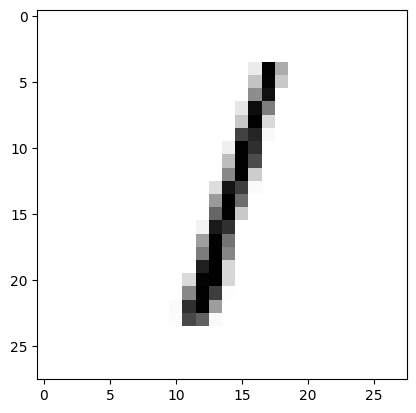

[9.9931622e-01 2.5499525e-10 1.0044221e-04 8.1562384e-06 1.7240808e-07
 2.5770871e-04 1.9502915e-04 6.8711015e-05 3.3636610e-05 1.9966299e-05]  =>  0


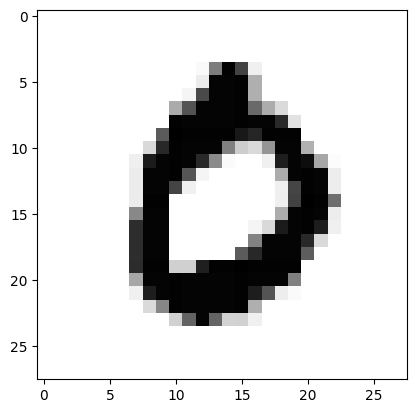

[4.1056075e-04 1.5947209e-06 2.4186219e-03 6.1098886e-05 9.6390647e-01
 1.3198894e-04 1.9741198e-03 2.5063027e-03 4.4196048e-03 2.4169676e-02]  =>  4


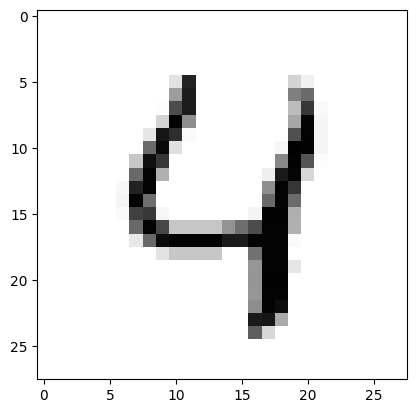

In [15]:
p1=model_lr.predict(X_test[:5])
p2=np.argmax(p1 , axis=1)

for i in range(5):
  print(p1[i],' => ',p2[i])
  plt.imshow(X_test[i], cmap='Greys')
  plt.show()

In [16]:
# model_lr.predict(X_test[18]) will give error as it a 28*28 array input while predtions are of the batch*728 size to fix
model_lr.predict(X_test[18:19]) # or X_test[18].reshape(1,28,28)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[2.4102557e-04, 2.0758987e-04, 1.9803612e-01, 6.4672935e-01,
        1.2611025e-03, 5.6905862e-02, 4.8864394e-02, 7.1957045e-05,
        4.7611728e-02, 7.0931972e-05]], dtype=float32)

In [17]:
# Install pandas package
%pip install pandas

import pandas as pd

test_data = pd.read_csv("C:/Users/HP/Downloads/test.csv")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [19]:
sample = pd.read_csv("C:/Users/HP/Downloads/sample_submission.csv")
test_data_reshaped = test_data.values.reshape(-1, 28, 28)
y_pred = model_lr.predict(test_data_reshaped)
y_pred

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [21]:
pred = pd.DataFrame(np.argmax(y_pred, axis=1), columns=['Label'])
sub_df = pd.read_csv("C:/Users/HP/Downloads/sample_submission.csv")
datasets = pd.concat([sub_df['ImageId'], pred], axis=1)
datasets.to_csv('sample_submission.csv', index=False)